In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("F:\\Projects\\STC tv - Jul24\\Task 3\\STC TV Dataset T3.xlsb")

In [4]:
data = df
data.head()

,Unnamed: 0,user_id_maped,program_name,rating,date_,program_genre
0,0,26138,100 treets,1,2017-05-27,Drama
1,1,7946,Moana,1,2017-05-21,Animation
2,2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,4,15860,Churchill,2,2017-07-07,Biography


In [5]:
data = data.drop(columns=['Unnamed: 0'])

In [6]:
data.columns = ['id', 'program name', 'rating', 'date', 'genre']

In [7]:
features = data.columns
features

Index(['id', 'program name', 'rating', 'date', 'genre'], dtype='object')

In [8]:
data.head()

,id,program name,rating,date,genre
0,26138,100 treets,1,2017-05-27,Drama
1,7946,Moana,1,2017-05-21,Animation
2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,15860,Churchill,2,2017-07-07,Biography


In [9]:
data.shape

(1048575, 5)

In [10]:
data.describe()

,id,rating,date
count,1.048575e+06,1.048575e+06,1048575
mean,1.709266e+04,2.497283e+00,2017-10-04 00:23:20.346183936
min,1.000000e+00,1.000000e+00,2017-03-14 00:00:00
25%,8.253000e+03,1.000000e+00,2017-06-10 00:00:00
50%,1.714900e+04,2.000000e+00,2017-10-14 00:00:00
75%,2.566500e+04,3.000000e+00,2018-01-21 00:00:00
max,3.428000e+04,4.000000e+00,2018-04-30 00:00:00
std,1.003513e+04,1.119837e+00,NaN


In [11]:
data['date'] = pd.to_datetime(data['date'])
data['id'] = data['id'].astype(str)

In [12]:
data.describe()

,rating,date
count,1.048575e+06,1048575
mean,2.497283e+00,2017-10-04 00:23:20.346183936
min,1.000000e+00,2017-03-14 00:00:00
25%,1.000000e+00,2017-06-10 00:00:00
50%,2.000000e+00,2017-10-14 00:00:00
75%,3.000000e+00,2018-01-21 00:00:00
max,4.000000e+00,2018-04-30 00:00:00
std,1.119837e+00,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   id            1048575 non-null  object        
 1   program name  1048575 non-null  object        
 2   rating        1048575 non-null  int64         
 3   date          1048575 non-null  datetime64[ns]
 4   genre         1048575 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 40.0+ MB


In [14]:
data.isnull().sum()

id              0
program name    0
rating          0
date            0
genre           0
dtype: int64

In [15]:
data['program name'].nunique()

8013

In [16]:
data['genre'].nunique()

16

In [17]:
for genre in data['genre'].unique():
  print(genre)

Drama
Animation
Biography
Action
Comedy
Horror
NOT_DEFINED_IN_UMS
Thriller
Documentary
Crime
Family
Romance
Sci-Fi
Adventure
SERIES_NOT_ADDED_UNDER_ANY_GENRE
Wrestling


In [18]:
features

Index(['id', 'program name', 'rating', 'date', 'genre'], dtype='object')

### EDA

In [19]:
data['series'] = 0

In [20]:
data.loc[data['program name'].str.contains('Ep', na=False), 'series'] = 1

In [21]:
data.loc[data['program name'].str.contains('Epic', na=False), 'series'] = 0

In [22]:
data[data['series']==1]

,id,program name,rating,date,genre,series
82,30849,Wannous Ep20,3,2017-12-26,Drama,1
168,27587,Kalam A-Nas Ep28,3,2018-01-07,Comedy,1
189,10865,Doctor Amrad Nesa Ep2,3,2017-04-21,Drama,1
235,22245,A-Shaqiqatan Ep6,4,2018-03-06,Drama,1
392,22512,A-Sayeda Al Oula Ep5,2,2018-02-16,Drama,1
...,...,...,...,...,...,...
1048518,15467,Taymour Ep.,2,2017-04-18,Family,1
1048525,17147,Laqet Rohey Ep12,4,2017-11-28,Drama,1
1048543,30605,Sadeeqat Al Omor Ep13,4,2017-04-03,Drama,1
1048550,25425,Kalam A-Nas Ep12,2,2017-12-11,Comedy,1


In [23]:
data.groupby(['program name'])['rating'].count().sort_values(ascending=False).head(5)

program name
The Boss Baby                          24047
Pingu                                  17063
Trolls                                 13793
The Adventures of Petey and Friends     9612
Moana                                   8081
Name: rating, dtype: int64

In [24]:
data.groupby(['program name', 'series']).agg({
    'id': [('user', 'nunique'), ('total_user', 'count')],
    'rating': [('total rating', 'sum')]
}).reset_index()

program name series   id                  rating
                                          user total_user total rating
0                    #FollowFriday      0  316        510          910
1            10 Days in a Madhouse      0  301        553          944
2                       100 treets      0  704       1851         3399
3                   101 Dalmatians      0   85        118          173
4                   102 Dalmatians      0  130        172          268
...                            ...    ...  ...        ...          ...
8008  iCarly  iWant A World Record      0   61        172          517
8009    iCarly  iWant More Viewers      0   76        217          625
8010    iCarly  iWill Date Freddie      0   61        183          544
8011                           xXx      0   58         94          160
8012    xXx: Return of Xander Cage      0  402        853         1775

[8013 rows x 5 columns]

In [25]:
def extract_series_name(data):
    if data['series'] == 1:
        return data['program name'].split('Ep')[0].strip()
    else:
        return None
def extract_movie_name(data):
    if data['series'] == 0:
        return data['program name']
    else: return None

In [26]:
data['series name'] = data.apply(extract_series_name, axis=1)

In [27]:
data['movie name'] = data.apply(extract_movie_name, axis=1)

In [28]:
data['series name'].notnull().count()

1048575

In [29]:
data[data['series']==1]

,id,program name,rating,date,genre,series,series name,movie name
82,30849,Wannous Ep20,3,2017-12-26,Drama,1,Wannous,None
168,27587,Kalam A-Nas Ep28,3,2018-01-07,Comedy,1,Kalam A-Nas,None
189,10865,Doctor Amrad Nesa Ep2,3,2017-04-21,Drama,1,Doctor Amrad Nesa,None
235,22245,A-Shaqiqatan Ep6,4,2018-03-06,Drama,1,A-Shaqiqatan,None
392,22512,A-Sayeda Al Oula Ep5,2,2018-02-16,Drama,1,A-Sayeda Al Oula,None
...,...,...,...,...,...,...,...,...
1048518,15467,Taymour Ep.,2,2017-04-18,Family,1,Taymour,None
1048525,17147,Laqet Rohey Ep12,4,2017-11-28,Drama,1,Laqet Rohey,None
1048543,30605,Sadeeqat Al Omor Ep13,4,2017-04-03,Drama,1,Sadeeqat Al Omor,None
1048550,25425,Kalam A-Nas Ep12,2,2017-12-11,Comedy,1,Kalam A-Nas,None


In [84]:
series_sub = data.groupby(['series name', 'genre'])['rating'].agg(['mean', 'count']).reset_index()

series_sub

,series name,genre,mean,count
0,2 Fil-Isaaf,Comedy,2.740506,474
1,24 Carat,Drama,3.187259,1036
2,A tory and a Proverb,Animation,2.148571,175
3,A-Sayeda Al Oula,Drama,3.200441,1362
4,A-Shaqiqatan,Drama,3.085132,834
...,...,...,...,...
121,Weeds,Comedy,3.301619,494
122,Welada Min Al Khasira -,Drama,1.000000,1
123,Ya Reit,Drama,3.167845,1698
124,Zakera Mn Waraq,Drama,3.233108,296


In [85]:
movies_sub = data.groupby(['movie name', 'genre'])['rating'].agg(['mean', 'count']).reset_index()

movies_sub

,movie name,genre,mean,count
0,#FollowFriday,Thriller,1.784314,510
1,10 Days in a Madhouse,Thriller,1.707052,553
2,100 treets,Drama,1.836305,1851
3,101 Dalmatians,Family,1.466102,118
4,102 Dalmatians,Action,1.564356,101
...,...,...,...,...
6296,iCarly iWant A World Record,Comedy,3.005814,172
6297,iCarly iWant More Viewers,Comedy,2.880184,217
6298,iCarly iWill Date Freddie,Comedy,2.972678,183
6299,xXx,Action,1.702128,94


In [32]:
# program_rating = data.groupby(['program name'])['rating'].agg(['mean', 'count']).reset_index()

# program_rating

,program name,mean,count
0,#FollowFriday,1.784314,510
1,10 Days in a Madhouse,1.707052,553
2,100 treets,1.836305,1851
3,101 Dalmatians,1.466102,118
4,102 Dalmatians,1.558140,172
...,...,...,...
8008,iCarly iWant A World Record,3.005814,172
8009,iCarly iWant More Viewers,2.880184,217
8010,iCarly iWill Date Freddie,2.972678,183
8011,xXx,1.702128,94


In [33]:
data['program name'].nunique()

8013

In [34]:
data['series name'].nunique()

125

In [35]:
data['movie name'].nunique()

6285

In [36]:
data['rating'].count()

1048575

In [37]:
sum=6394*2
sum

12788

In [38]:
data['id'].nunique()

11578

In [39]:
# series_sub['rating'].sum()+movies_sub['rating'].sum()

In [40]:
print(data['series name'].notnull().sum())

88585


In [41]:
print(data['movie name'].notnull().sum())


959990


## Demographic Filtering
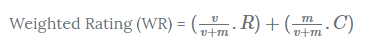
- v is the number of votes for the movie;
- m is the
 minimum votes required to be listed in the chart;
- R is the average rating of the movie; And
- C is the mean vote across the whole report

### Calculating el avr

In [42]:
C_program = program_rating['mean'].mean()
print(f'Program avr is: {C_program.round(3)}')

C_movies = movies_sub['mean'].mean()
print(f'Movies avr is: {C_movies.round(3)}')

C_series = series_sub['mean'].mean()
print(f'Series avr is: {C_series.round(3)}')

Program avr is: 2.818
Movies avr is: 2.743
Series avr is: 2.799


### Calculating el quantile

In [43]:
m_program = program_rating['count'].quantile(0.9)
print(f'Programs quantile is: {m_program.round(3)}')

m_movies = movies_sub['count'].quantile(0.9)
print(f'Movies quantile is: {m_movies.round(3)}')

m_series = series_sub['count'].quantile(0.9)
print(f'Series quantile is: {m_series.round(3)}')

Programs quantile is: 252.0
Movies quantile is: 297.6
Series quantile is: 1830.4


### Qualified: programs, movies and series

In [44]:
# q_program = program_rating[program_rating['count']>=m_program]
# print(f'qualified programs shape: {q_program.shape}')
q_movies = movies_sub[movies_sub['count']>=m_movies]
print(f'qualified movies shape: {q_movies.shape}')
q_series = series_sub[series_sub['count']>=m_series]
print(f'qualified series shape: {q_series.shape}')

qualified programs shape: (804, 3)
qualified movies shape: (629, 3)
qualified series shape: (13, 3)


### Appling the formula based on IMDB

In [45]:
# def weighted_rating_program(x=program_rating, m=m_program, C=C_program):
#     v = x['count']
#     R = x['mean']
#     return (v/(v+m) * R) + (m/(m+v) * C)

In [46]:
def weighted_rating_movies(x=movies_sub, m=m_movies, C=C_movies):
    v = x['count']
    R = x['mean']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [47]:
def weighted_rating_series(x=series_sub, m=m_series, C=C_series):
    v = x['count']
    R = x['mean']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [48]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
# q_program['score'] = q_program.apply(weighted_rating_program, axis=1)
q_movies['score'] = q_movies.apply(weighted_rating_movies, axis=1)
q_series['score'] = q_series.apply(weighted_rating_series, axis=1)

C:\Users\Eldawlia\AppData\Local\Temp\ipykernel_21008\2015516996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_program['score'] = q_program.apply(weighted_rating_program, axis=1)
C:\Users\Eldawlia\AppData\Local\Temp\ipykernel_21008\2015516996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies['score'] = q_movies.apply(weighted_rating_movies, axis=1)
C:\Users\Eldawlia\AppData\Local\Temp\ipykernel_21008\2015516996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [49]:
q_program.head()

,program name,mean,count,score
0,#FollowFriday,1.784314,510,2.126045
1,10 Days in a Madhouse,1.707052,553,2.054716
2,100 treets,1.836305,1851,1.953897
5,11.6,2.018470,379,2.337632
31,12 Monkeys plinter,2.577703,296,2.688040


### Sort by the calculating score above!!
For each: program, movie and series

In [50]:
# Program
# q_program = q_program.sort_values('score', ascending=False)

# Print top 15
# q_program.head()

,program name,mean,count,score
5288,PAW Patrol Pups ave A chool Day,3.610630,809,3.422287
5275,PAW Patrol Pups And The Beanstalk,3.600000,810,3.414356
5295,PAW Patrol Pups ave The Easter Egg Hunt,3.591687,818,3.409389
5281,PAW Patrol Pups Go All Monkey / Pups ave A Hoot,3.595449,791,3.407523
5278,PAW Patrol Pups And The Lighthouse Boogie,3.596129,775,3.405108


In [51]:
# Movies
q_movies = q_movies.sort_values('score', ascending=False)

# Print top 15
q_movies.head()

,movie name,mean,count,score
4005,PAW Patrol Pups ave A chool Day,3.610630,809,3.377369
3992,PAW Patrol Pups And The Beanstalk,3.600000,810,3.369805
4012,PAW Patrol Pups ave The Easter Egg Hunt,3.591687,818,3.365360
3998,PAW Patrol Pups Go All Monkey / Pups ave A Hoot,3.595449,791,3.362480
3995,PAW Patrol Pups And The Lighthouse Boogie,3.596129,775,3.359497


In [52]:
# Series
q_series = q_series.sort_values('score', ascending=False)

# Print top 15
q_series.head()

,series name,mean,count,score
97,Sadeeqat Al Omor,3.205067,4579,3.089066
63,Hal Manayer,3.166164,2654,3.016248
57,Ezai E-Sehha,3.181818,1870,2.992396
77,Laqet Rohey,3.062472,2209,2.943027
90,Nan and Lili,2.928146,5038,2.893696


## Content Based Filtering
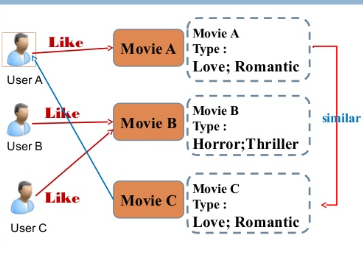

In [53]:
for genre in data['genre'].unique():
  print(genre)

Drama
Animation
Biography
Action
Comedy
Horror
NOT_DEFINED_IN_UMS
Thriller
Documentary
Crime
Family
Romance
Sci-Fi
Adventure
SERIES_NOT_ADDED_UNDER_ANY_GENRE
Wrestling


In [54]:
features

Index(['id', 'program name', 'rating', 'date', 'genre'], dtype='object')

In [55]:
data['program name'].head()

0              100 treets
1                   Moana
2    The Mermaid Princess
3    The Mermaid Princess
4               Churchill
Name: program name, dtype: object

### Not important due to lack of 'overview' column
###### If there was an overview column, we'd used TF-IDF matrix. But, unfortunately, we don't have it. So, the following code is not considered. 

In [58]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [59]:
#Replace NaN with an empty string
movies_sub['genre'] = movies_sub['genre'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_movies = tfidf.fit_transform(movies_sub['genre'])

#Output the shape of tfidf_matrix
tfidf_matrix_movies.shape

(6301, 16)

In [60]:
#Replace NaN with an empty string
series_sub['genre'] = series_sub['genre'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_series = tfidf.fit_transform(series_sub['genre'])

#Output the shape of tfidf_matrix
tfidf_matrix_series.shape

(126, 12)

#### Cosine Similarity
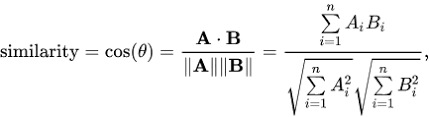
###### Name - T-Shirt - Jeans - Choes
###### Ahmed: White - Blue - Black
###### Mohamed: White - Blue - Black
###### Ziad : White - Blue - ??? (most likely black too)

In [61]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

In [62]:
# Compute the cosine similarity matrix - Movies

cosine_sim_movies = linear_kernel(tfidf_matrix_movies, tfidf_matrix_movies)

In [63]:
# Compute the cosine similarity matrix
cosine_sim_series = linear_kernel(tfidf_matrix_series, tfidf_matrix_series)

### Continue: title similarity!

In [74]:
#Construct a reverse map of indices and movie titles
#indices_p = pd.Series(data.index, index=data['program name']).drop_duplicates()
indices_m = pd.Series(movies_sub.index, index=movies_sub['movie name']).drop_duplicates()
indices_s = pd.Series(series_sub.index, index=series_sub['series name']).drop_duplicates()

- Get the index of the movie given its title.
- Get the list of cosine similarity scores for that - - - - - particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
- Return the titles corresponding to the indices of the top elements.

In [78]:
# Function: movie name(input) --> similar movies(output)
def get_recommnedation_movies(title, cosine_sim=cosine_sim_movies):
    # get the index of the program that matches
    idx = indices_m[title]

    # get pairwise similarity score of all movies that matches the particular program
    sim_scores = list(enumerate(cosine_sim[idx]))

    # similarity sorting
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # get program indices
    movie_indices = [i[0] for i in sim_scores]

    # return top 10 similar
    return movies_sub['movie name'].iloc[movie_indices]

In [80]:
# Function: series title(input) --> similar serieses(output)
def get_recommnedation_series(title, cosine_sim=cosine_sim_series):
    # get the index of the program that matches
    idx = indices_s[title]

    # get pairwise similarity score of all movies that matches the particular program
    sim_scores = list(enumerate(cosine_sim[idx]))

    # similarity sorting
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # get program indices
    series_indices = [i[0] for i in sim_scores]

    # return top 10 similar
    return series_sub['series name'].iloc[series_indices]

In [82]:
get_recommnedation_movies('Moana')

210                                   Aladdin
227                   Alvin and the Chipmunks
228    Alvin and the Chipmunks: The Road Chip
229    Alvin and the Chipmunks: The queakquel
317                                 Anastasia
320                              Angelo Rules
333                        Animal Mechanicals
337                                 Anomalisa
340                                      Antz
343                           Appleseed Alpha
Name: movie name, dtype: object

In [83]:
get_recommnedation_series('Weeds')

9               Al Bayt Al Kabeer
23            Ana Wa Baba Wa Mama
32     Black-ish  (T)   Black-ish
33          Blackish     Blackish
34                     Blunt Talk
37                     Bou Droosh
42    Community  (T)    Community
46                    Dalaa Banat
57                   Ezai E-Sehha
61           Friends      Friends
Name: series name, dtype: object